#Import required packages

In [74]:
import numpy as np
import matplotlib.pyplot as plt
import random

In [75]:
#seed random number generator of numpy for reproducibility
np.random.seed(21)

#Data Generation

1. Generate 10 two-dimensional data points from a multi-variate Gaussian distribution with mean [0,0] and identity covariance matrix. Label data points as class +1. Consider this labeled data set as $D_1$.  ($\textbf{Hint:}$ Use numpy.random.multivariate_normal)

## Mean and Covariance Matrix type
<li>In 1D, both mean and variance can be a single number.

<li>For 2D ($x$ and $y$), there will be 2 means ($\mu_x$ and $\mu_y$).
Also, Covariance matrix would be
$$Cov=\begin{bmatrix}
 \sigma_{xx}^2 & \sigma_{xy}^2 \\
 \sigma_{yx}^2 & \sigma_{yy}^2
\end{bmatrix}$$
The covariance matrix is therefore symmetric and also a positive semidefinite will help in proper sampling.

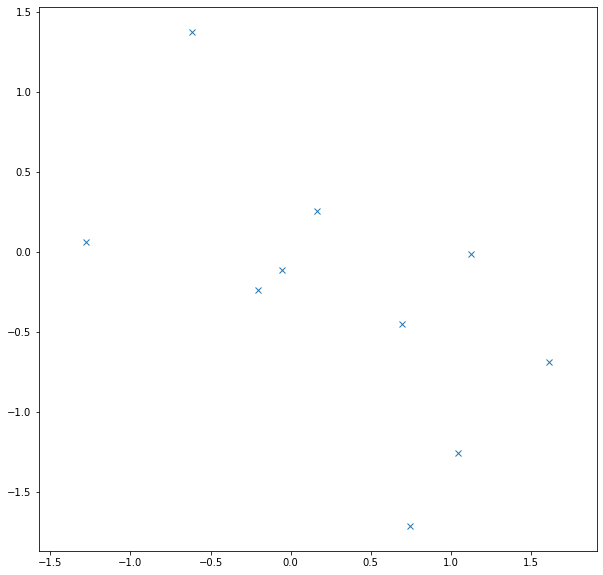

In [76]:
#Generate D_1
mean=np.array([0,0])
cov=np.eye(2,2)

#seed random number generator of numpy for reproducibility
np.random.seed(21)
D1 = np.random.multivariate_normal(mean, cov, 10)
x1,y1=D1.T

#Adding Label +1 
D1=np.insert(D1,D1.shape[1],int(1),axis=1)

#plotting D1
plt.figure(figsize=(10,10))
plt.plot(x1, y1, 'x')
plt.axis('equal')
plt.show()

2. Generate 10 two-dimensional data points from a multi-variate Gaussian distribution with mean [-2,-2] and identity covariance matrix. Label data points as class -1. Consider this labeled data set as $D_2$.

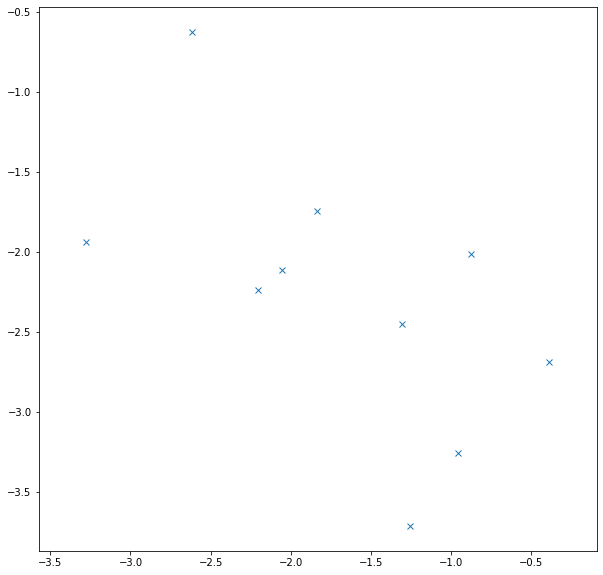

In [77]:
#Generate D_2
mean=np.array([-2,-2])
cov=np.eye(2,2)

#seed random number generator of numpy for reproducibility
np.random.seed(21)
D2 = np.random.multivariate_normal(mean, cov, 10)
x2, y2 = D2.T

#Adding Label +1 
D2=np.insert(D2,D2.shape[1],int(-1),axis=1)

plt.figure(figsize=(10,10))
plt.plot(x2, y2, 'x')
plt.axis('equal')
plt.show()

3. Construct $D=D_1 \cup D_2$. Shuffle the data in $D$. (Hint: Use random.shuffle().)

In [78]:
print("D1\n",D1)
print("D2\n",D2)

D1
 [[-0.05196425 -0.11119605  1.        ]
 [ 1.0417968  -1.25673929  1.        ]
 [ 0.74538768 -1.71105376  1.        ]
 [-0.20586438 -0.23457129  1.        ]
 [ 1.12814404 -0.01262595  1.        ]
 [-0.61320029  1.3736885   1.        ]
 [ 1.61099198 -0.68922827  1.        ]
 [ 0.69192371 -0.4481156   1.        ]
 [ 0.16234247  0.25722913  1.        ]
 [-1.27545586  0.06400443  1.        ]]
D2
 [[-2.05196425 -2.11119605 -1.        ]
 [-0.9582032  -3.25673929 -1.        ]
 [-1.25461232 -3.71105376 -1.        ]
 [-2.20586438 -2.23457129 -1.        ]
 [-0.87185596 -2.01262595 -1.        ]
 [-2.61320029 -0.6263115  -1.        ]
 [-0.38900802 -2.68922827 -1.        ]
 [-1.30807629 -2.4481156  -1.        ]
 [-1.83765753 -1.74277087 -1.        ]
 [-3.27545586 -1.93599557 -1.        ]]


In [79]:
#Construct D and shuffle
D=np.concatenate((D1,D2),axis=0)
np.random.shuffle(D)
D

array([[-1.25461232, -3.71105376, -1.        ],
       [ 0.16234247,  0.25722913,  1.        ],
       [ 0.74538768, -1.71105376,  1.        ],
       [-0.87185596, -2.01262595, -1.        ],
       [ 1.0417968 , -1.25673929,  1.        ],
       [-2.05196425, -2.11119605, -1.        ],
       [ 0.69192371, -0.4481156 ,  1.        ],
       [ 1.12814404, -0.01262595,  1.        ],
       [-0.20586438, -0.23457129,  1.        ],
       [-1.83765753, -1.74277087, -1.        ],
       [-1.30807629, -2.4481156 , -1.        ],
       [-0.9582032 , -3.25673929, -1.        ],
       [-3.27545586, -1.93599557, -1.        ],
       [-0.61320029,  1.3736885 ,  1.        ],
       [-0.05196425, -0.11119605,  1.        ],
       [-2.20586438, -2.23457129, -1.        ],
       [-0.38900802, -2.68922827, -1.        ],
       [-1.27545586,  0.06400443,  1.        ],
       [ 1.61099198, -0.68922827,  1.        ],
       [-2.61320029, -0.6263115 , -1.        ]])

#Data Visualization

Write code to visualize the data $D$ you have generated. Use different colors for different classes. (Use matplotlib.pyplot.scatter to plot the points.)

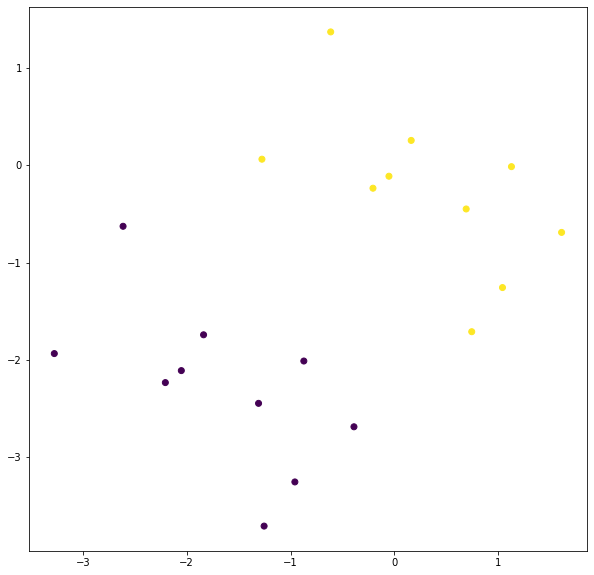

In [80]:
def plot_data(data,lineplot=False):
  #write code to plot the data points. Use different colors for different classes.
  if data.shape[1]!=3:
    raise Exception("Add label to 2D data!")
  x,y,label=data.T
  

  plt.figure(figsize=(10,10))
  plt.scatter(x, y, c=label)

  if not lineplot:
    plt.show()


plot_data(D)

#Perceptron prediction function

Write code to implement the prediction rule used in Perceptron. (Use the numpy function which helps in computing the dot product between two vectors.)

In [81]:
def perceptron_prediction(w, x):
    #write code to compute the prediction for the example x using weight w
    pred=np.dot(w,x)
    if pred>=0:
      prediction = +1
    else:
      prediction = -1
    
    return prediction

#Function to update weights 

Write code to implement the update rule for updating weights in perceptron learning algorithm. If there is a mistake in prediction made by perceptron, return is_mistake as True, otherwise return is_mistake as False. 

In [82]:
def perceptron_update_weights(w, x, y, y_pred):
    is_mistake = False
    #check for mistake and set is_mistake flag accordingly
    #and write code to update the weights in perceptron 
    if y_pred!=y:
      is_mistake=True
      w=w+y*x
    return w, is_mistake

#Training procedure for perceptron

Complete the training procedure to train perceptron by adding appropriate code where required.

In [199]:
def train_perceptron(data, ANIMATE=False):
    #Initialize weights 
    #w = ??  # try randomly generating w or zero initialization
    w=np.random.rand(data.shape[1])
    epochs=0 #useful for executing multiple passes over a finite data set
    num_mistakes = 99 #some dummy value to get the while loop going 
    max_epochs = 50

    #storing all weights
    wAll=[]
    wAll.append(w)

    while num_mistakes > 0 and epochs<max_epochs:   # until mistakes are not zero or number of epochs reach max_epochs
        num_mistakes = 0
        for i in range(len(data)):
            #retrieve the feature vector x from data set D 
            x = data[i,0:2]
            #Append an additional constant feature 1 to x (Use np.concatenate)
            x = np.concatenate((x,1), axis=None)
            
            y_hat = perceptron_prediction(w, x)
            
            #retrieve the label y for x from data set D 
            y = data[i,2]
            
            w, is_mistake = perceptron_update_weights(w, x, y, y_hat)
            
            
            if is_mistake:
              num_mistakes += 1

        epochs=epochs+1
        wAll.append(w)
    
    #for animation
    if ANIMATE:
      return wAll, epochs

    return w

#Plotting the separating line

Write code to plot the separating line along with the data.

In [200]:
def plot_data_with_separator(data, w):
  #write required code. (You can reuse the code written for plotting the data points.)
  plot_data(data,True)
  #using two points in a line to plot
  xPoint=np.array([0,0])
  xPoint[0]=min(data[:,0])-1
  xPoint[1]=max(data[:,0])+1
  yPoint= (w[0]*xPoint+w[2])/(-w[1])
  plt.plot(xPoint,yPoint)
  plt.show()


#Calling the Perceptron train function.

In [201]:
w_final = train_perceptron(data)    

#Calling the plot function to plot separator

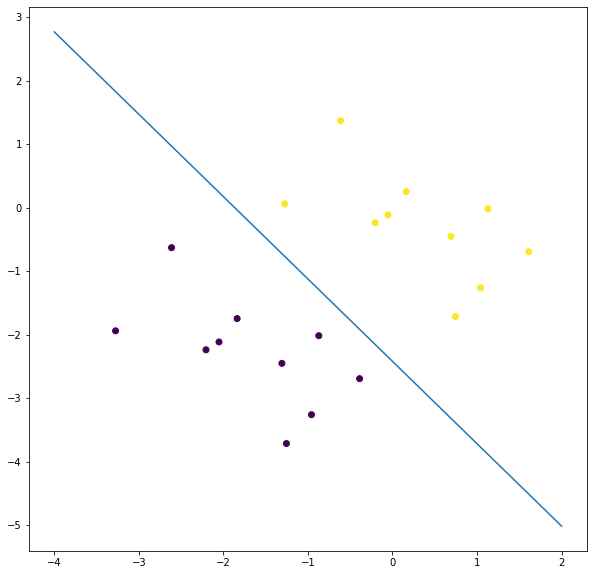

In [202]:
plot_data_with_separator(data, w_final)

#Additional functionality (Optional):

Illustrate the behavior of the separating line between the updates as contiguous plots or as animation. Highlight the data points which cause the update in the separating line orientations.



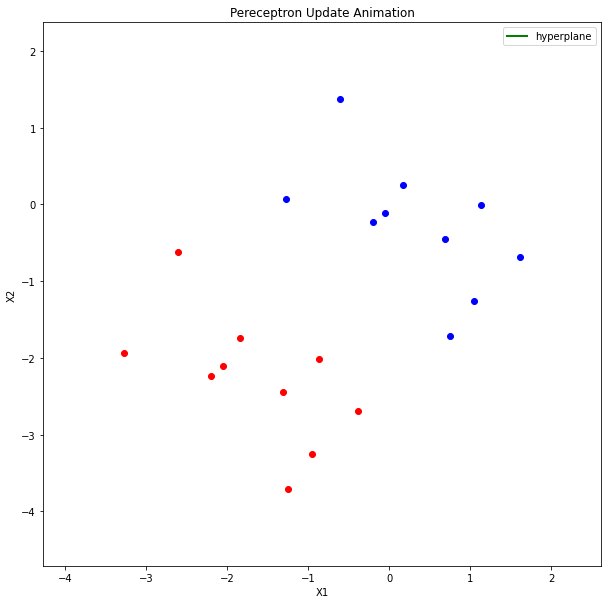

In [203]:
%matplotlib inline

import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

data=D
x1,y1,_=D1.T
x2,y2,_=D2.T

# create a figure and axes
fig = plt.figure(figsize=(10,10))
ax1 = plt.subplot(1,1,1)   


# set up the subplots as needed
ax1.set_xlim(( min(x2)-1, max(x1)+1))            
ax1.set_ylim((min(y2)-1, max(y1)+1))
ax1.set_xlabel('X1')
ax1.set_ylabel('X2')



# create objects that will change in the animation. These are
# initially empty, and will be given new values for each frame
# in the animation.
txt_title = ax1.set_title('Pereceptron Update Animation')
line1, = ax1.plot([], [], 'g', lw=2)     # ax.plot returns a list of 2D line objects



line2 = ax1.plot(x1,y1,'bo',x2,y2,'ro')


ax1.legend(['hyperplane']);

In [204]:
# animation function. This is called sequentially
#using two points in a line to plot
xPoint=np.array([0,0])
xPoint[0]=min(data[:,0])-1
xPoint[1]=max(data[:,0])+1

wAll, EPOCHS=train_perceptron(data,ANIMATE=True)
def drawframe(n):
   
    w=wAll[n]
    yPoint= (w[0]*xPoint+w[2])/(-w[1])
    line1.set_data(xPoint, yPoint)
    txt_title.set_text('EPOCH Number {0:4d}'.format(n))
    return line1,



In [205]:
from matplotlib import animation

# blit=True re-draws only the parts that have changed.
anim = animation.FuncAnimation(fig, drawframe, frames=EPOCHS+1, interval=1000, blit=True)

In [206]:
from IPython.display import HTML
HTML(anim.to_html5_video())

In [207]:
from matplotlib import rc

# equivalent to rcParams['animation.html'] = 'html5'
rc('animation', html='html5')

In [208]:
anim